In [1]:
from keras.datasets import mnist

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
import tensorflow 
from sklearn.model_selection import train_test_split

In [3]:
train_csv = pd.read_csv("train.csv")
test_csv = pd.read_csv("test.csv")

In [4]:
train = np.array(train_csv)
test = np.array(test_csv)
print(train.shape, test.shape)

feature = train[:, 1:]
label = train[:, :1]

(42000, 785) (28000, 784)


In [5]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)
print(train_X.shape)

(60000, 784)


In [6]:
all_feature = np.r_[feature, train_X, test_X]
all_label = np.r_[label.ravel(), train_y, test_y]
print(all_feature.shape, all_label.shape)

(112000, 784) (112000,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(all_feature, all_label, test_size = 0.1, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100800, 784) (100800,) (11200, 784) (11200,)


C:\Users\mail2\anaconda3\envs\my\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


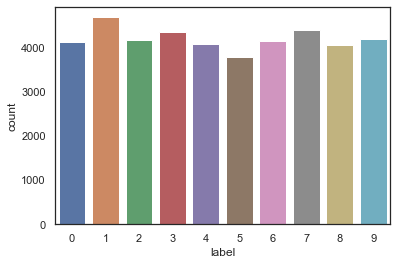

In [8]:
sns.set(style='white')
g = sns.countplot(train_csv['label'])

In [9]:
train_csv.isnull().any().any()

False

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28,1)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train_oneHot = to_categorical(y_train, num_classes= 10)
y_test_oneHot = to_categorical(y_test, num_classes=10)

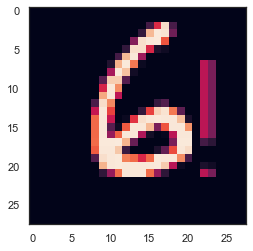

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3][:, :, 0])

In [14]:
from keras.layers import Convolution2D, Dense, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same', input_shape = (28, 28, 1), activation='relu'))
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))       
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))       
model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))       
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(units=256, activation='relu',))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [15]:
model.compile(optimizer='RMSprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)

In [17]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(X_train)

In [18]:
history = model.fit_generator(datagen.flow(X_train, y_train_oneHot, batch_size=512),
                              epochs = 10, validation_data=(X_test, y_test_oneHot),
                              verbose = 1, steps_per_epoch=X_train.shape[0]/512, 
                              callbacks=[learning_rate_reduction])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
197/196 [==============================] - 466s 2s/step - loss: 0.4733 - accuracy: 0.8499 - val_loss: 0.0709 - val_accuracy: 0.9779
Epoch 2/10
197/196 [==============================] - 457s 2s/step - loss: 0.0818 - accuracy: 0.9755 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 3/10
197/196 [==============================] - 438s 2s/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0299 - val_accuracy: 0.9905
Epoch 4/10
197/196 [==============================] - 410s 2s/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 5/10
197/196 [==============================] - 404s 2s/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0240 - val_accuracy: 0.9924
Epoch 6/10
197/196 [==============================] - 406s 2s/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 7/10
197/196 [==============================] - 408s 2s/step

In [19]:
model.evaluate(X_test, y_test_oneHot)

350/350 [==============================] - 14s 40ms/step - loss: 0.0175 - accuracy: 0.9944


[0.01753428392112255, 0.9943749904632568]

In [20]:
testing_data = scaler.transform(test).reshape(-1, 28, 28, 1)  
CNN_prediction = model.predict_classes(testing_data)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
sub = pd.DataFrame(CNN_prediction)
sub.index += 1
sub.index.name = 'ImageId'
sub.columns = ['Label']
sub.to_csv('sub.csv',header=True)
sub.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
